<a href="https://colab.research.google.com/github/dnnxl/ML-Notes/blob/master/Reinforcement%20Learning/Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reinforcement Learning

Reinforcement Learning is a branch of Machine Learning, also called Online Learning. It is used to solve interacting problems where the data observed up to time t is considered to decide which action to take at time t + 1. It is also used for Artificial Intelligence when training machines to perform tasks such as walking. Desired outcomes provide the AI with reward, undesired with punishment. Machines learn through trial and error.

In this part, you will understand and learn how to implement the following Reinforcement Learning models:

1. Upper Confidence Bound (UCB)
2. Thompson Sampling

<BR>

> ### Upper Confidence Bound (UCB)

**Algorithm**

1. At each rounf n, we consider two numbers for each ad $i$:

 - $N_i(n)$ the number of times the ad $i$ was selected up to round $n$,
 
 - $R_i(n)$ the sum of rewards of the ad $i$ up to round $n$
 

2 From these two numbers we compute:

   - The average reward of ad $i$ up to round $n$

\begin{equation*}
\overline {r_i}(n) = \frac{R_i(n)}{N_i(n)}
\end{equation*}

   - The confidence interval $[ \overline {r_i}(n) - \Delta_i(n), \overline {r_i}(n) + \Delta_i(n)]$ at round $n$ with
 
\begin{equation*}
\Delta_i(n) = \sqrt{ \frac{3 log(n)}{2 N_i(n)}}
\end{equation*}


3 We select the ad $i$ that has the maximum $UCB$   $ \overline {r_i}(n) + \Delta_i(n)$

<BR>

**Python implementation**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")
pd.DataFrame(dataset)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


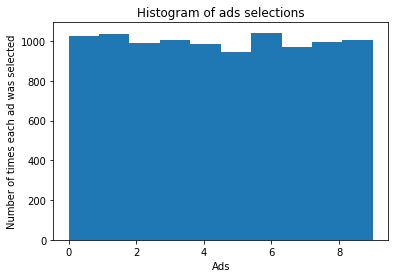

In [3]:
# Implementing Random Selection
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward

# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [4]:
total_reward

1212

In [5]:
ads_selected

[4,
 9,
 7,
 7,
 3,
 4,
 2,
 0,
 3,
 9,
 5,
 9,
 2,
 3,
 4,
 1,
 0,
 0,
 7,
 2,
 6,
 8,
 9,
 1,
 8,
 1,
 5,
 4,
 4,
 0,
 7,
 1,
 3,
 3,
 9,
 2,
 0,
 8,
 3,
 0,
 7,
 8,
 5,
 0,
 9,
 8,
 6,
 0,
 9,
 7,
 9,
 9,
 2,
 0,
 8,
 4,
 5,
 8,
 4,
 3,
 7,
 1,
 8,
 2,
 5,
 0,
 6,
 9,
 2,
 7,
 8,
 3,
 2,
 9,
 9,
 8,
 1,
 1,
 6,
 4,
 5,
 3,
 8,
 2,
 4,
 7,
 0,
 5,
 3,
 0,
 0,
 2,
 9,
 5,
 6,
 6,
 0,
 0,
 2,
 6,
 3,
 5,
 0,
 3,
 5,
 6,
 2,
 3,
 6,
 8,
 9,
 6,
 8,
 6,
 2,
 5,
 3,
 0,
 0,
 6,
 7,
 2,
 5,
 6,
 8,
 9,
 0,
 7,
 3,
 5,
 1,
 8,
 9,
 4,
 8,
 4,
 2,
 4,
 8,
 2,
 8,
 9,
 2,
 0,
 6,
 1,
 7,
 0,
 7,
 5,
 2,
 4,
 6,
 4,
 2,
 7,
 8,
 3,
 5,
 6,
 0,
 4,
 3,
 9,
 4,
 9,
 7,
 6,
 8,
 1,
 0,
 4,
 7,
 8,
 6,
 7,
 3,
 6,
 6,
 9,
 6,
 7,
 3,
 9,
 5,
 1,
 2,
 6,
 0,
 2,
 3,
 2,
 9,
 8,
 5,
 4,
 5,
 6,
 7,
 1,
 2,
 5,
 0,
 7,
 7,
 8,
 7,
 3,
 1,
 4,
 2,
 3,
 1,
 3,
 2,
 6,
 6,
 9,
 5,
 5,
 0,
 1,
 3,
 6,
 0,
 2,
 2,
 2,
 6,
 2,
 4,
 3,
 2,
 0,
 1,
 3,
 5,
 6,
 6,
 6,
 2,
 8,
 8,
 7,
 0,
 3,
 8,
 6,
 2,
 4,


In [6]:
[0]*10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [7]:
type(1e400)


float

**Implementing in python**

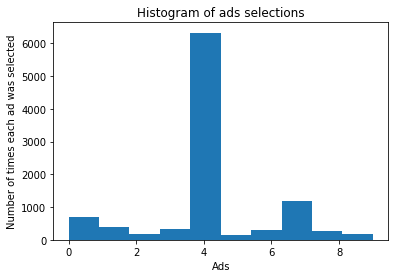

In [8]:
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

<BR>

- ## Thompson Sampling

**Python Implementation**

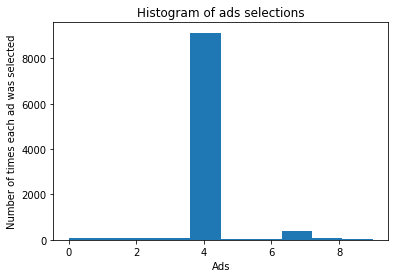

In [10]:
# Thompson Sampling

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

# Implementing Thompson Sampling
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

# Visualising the results - Histogram
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()